RQ2: How are interactions and collaborative relationships between innovation actors emphasized in national quantum strategies?

Core Objective: To move beyond frequency analysis and map the structural topology of the innovation ecosystem, identifying how actors are linked within the strategic narrative.

0. Data Initialization

In [ ]:
import pandas as pd
output_df = pd.read_csv("output.csv")
entities_df = pd.read_csv("2entities_to_edit.csv")

Network Topology Construction

✅ Daten geladen.


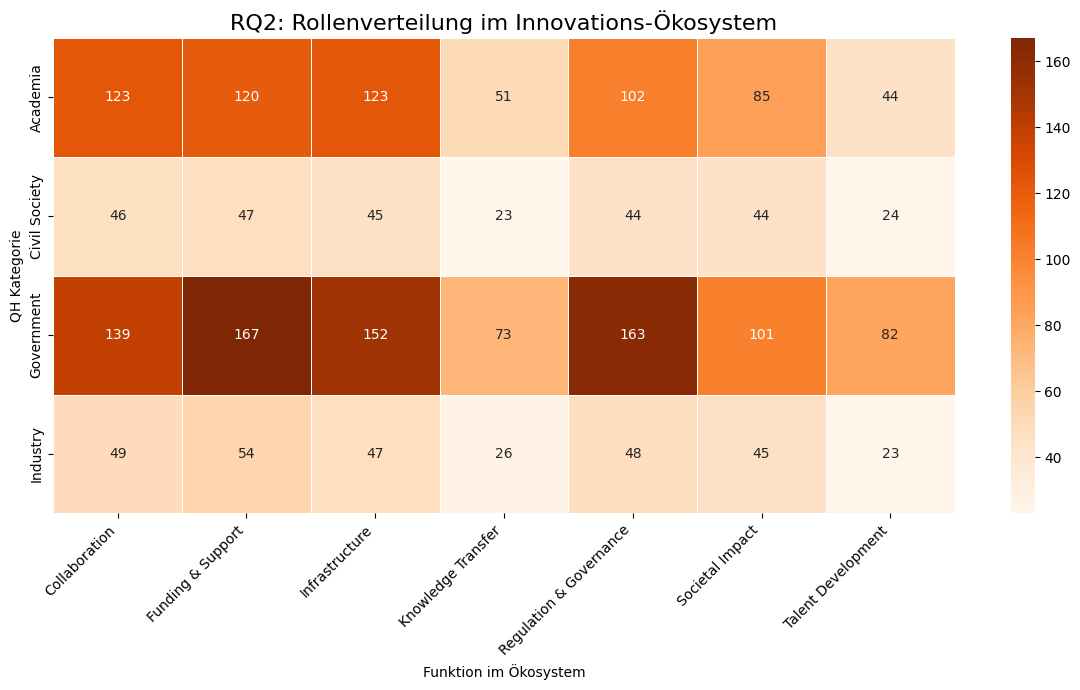

✅ Analyse gespeichert als 'rq2_ecosystem_roles.csv'.


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 2. DEFINITION DER "ECOSYSTEM THEMES" (Die Verbindungswörter)
ecosystem_themes = {
    'Knowledge Transfer': r'spin-out|spin-off|commercializ|transfer|patent|licens|ipr|intellectual propert|startup',
    'Collaboration': r'collaborat|partner|consorti|joint|co-operat|cluster|hub|ecosystem|network',
    'Funding & Support': r'fund|grant|invest|subsidy|budget|procur|financ|support|capital',
    'Regulation & Governance': r'regulat|standard|govern|law|ethic|oversight|polic|framework|security',
    'Talent Development': r'educat|train|skill|workforce|talent|phd|student|curricul|graduat',
    'Societal Impact': r'societ|public|citizen|ethic|trust|responsibl|social|aware',
    'Infrastructure': r'infrastructur|testbed|facilit|lab|center|centre|fabricat'
}

if 'output_df' in locals() and not output_df.empty:
    # 3. TEXT SCORING (Kommt das Keyword im Paragraph vor?)
    for theme, pattern in ecosystem_themes.items():
        # Wir suchen case-insensitive nach den Wortstämmen
        output_df[theme] = output_df['text'].fillna('').str.contains(pattern, case=False, regex=True).astype(int)

    # 4. MERGE (Akteure mit Themen verknüpfen)
    valid_qh = ['Academia', 'Government', 'Industry', 'Civil Society']
    filtered_entities = entities_df[entities_df['qh_category'].isin(valid_qh)].copy()
    
    # Wir verbinden Entities mit den getaggten Paragraphen
    merged_df = pd.merge(
        filtered_entities,
        output_df[['Doc_ID', 'Paragraph_ID', 'Country'] + list(ecosystem_themes.keys())],
        on=['Doc_ID', 'Paragraph_ID', 'Country'],
        how='left'
    )
    
    # 5. AGGREGATION FÜR HEATMAP
    # Umwandeln in "Long Format" für einfachere Zählung
    melted = pd.melt(merged_df, 
                     id_vars=['qh_category'], 
                     value_vars=list(ecosystem_themes.keys()), 
                     var_name='Ecosystem_Function', 
                     value_name='Present')
    
    # Nur Treffer behalten (wo Theme=1)
    melted = melted[melted['Present'] == 1]
    
    # Kreuztabelle erstellen: Wer macht was?
    ecosystem_matrix = melted.groupby(['qh_category', 'Ecosystem_Function']).size().unstack(fill_value=0)

    # 6. VISUALISIERUNG
    plt.figure(figsize=(12, 7))
    sns.heatmap(ecosystem_matrix, annot=True, fmt='d', cmap='Oranges', linewidths=.5)
    plt.title('RQ2: Rollenverteilung im Innovations-Ökosystem', fontsize=16)
    plt.ylabel('QH Kategorie')
    plt.xlabel('Funktion im Ökosystem')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.savefig('rq2_ecosystem_heatmap.png')
    plt.show()

    # Tabelle speichern
    ecosystem_matrix.to_csv("rq2_ecosystem_roles.csv")
    print("✅ Analyse gespeichert als 'rq2_ecosystem_roles.csv'.")

✅ Data loaded.
Scoring text for themes...
Processing CAN...


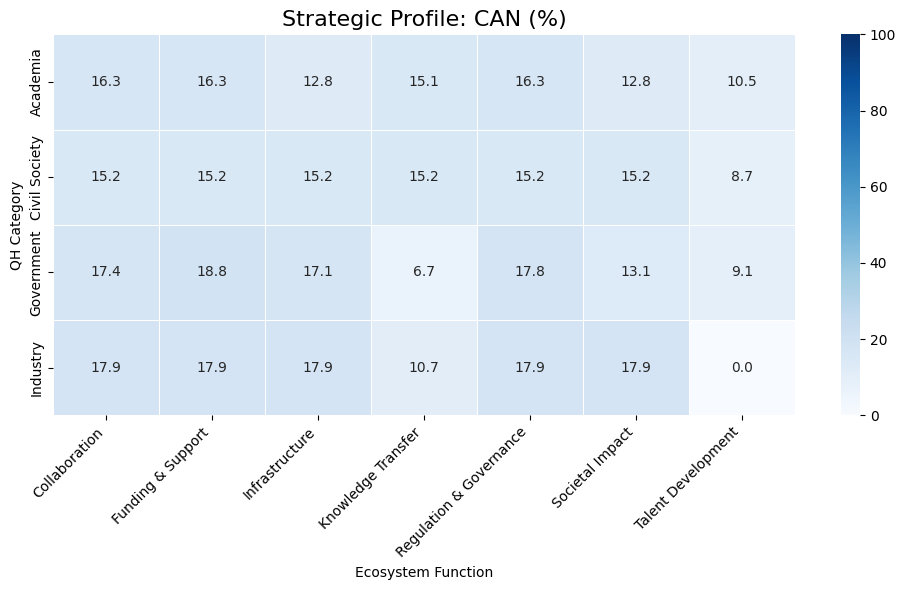

✅ Saved profile for CAN.
Processing GER...


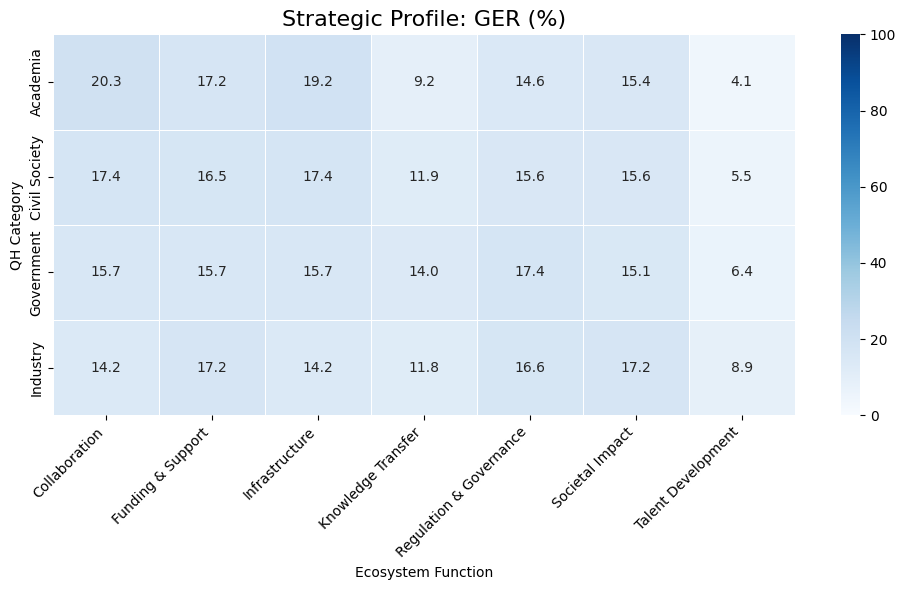

✅ Saved profile for GER.
Processing UK...


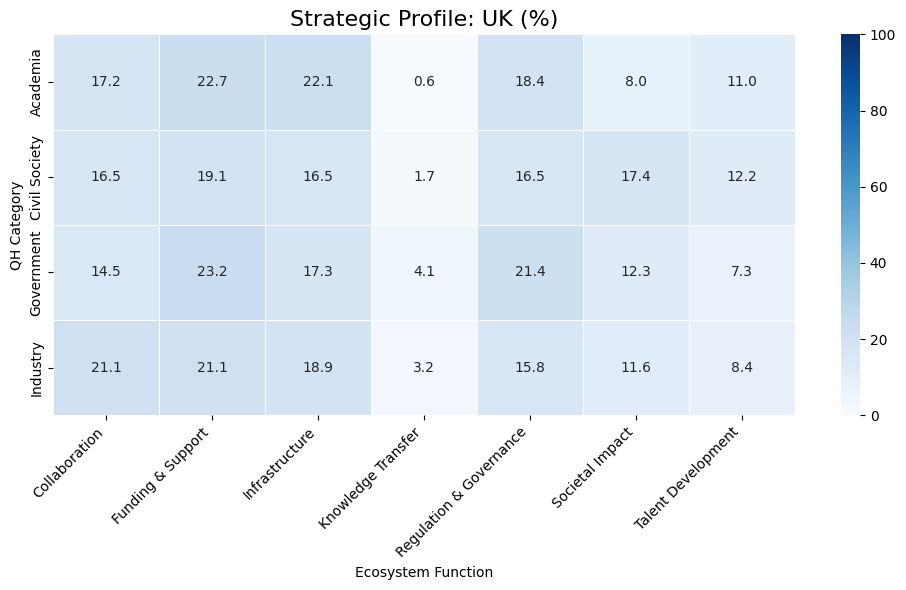

✅ Saved profile for UK.
Processing USA...


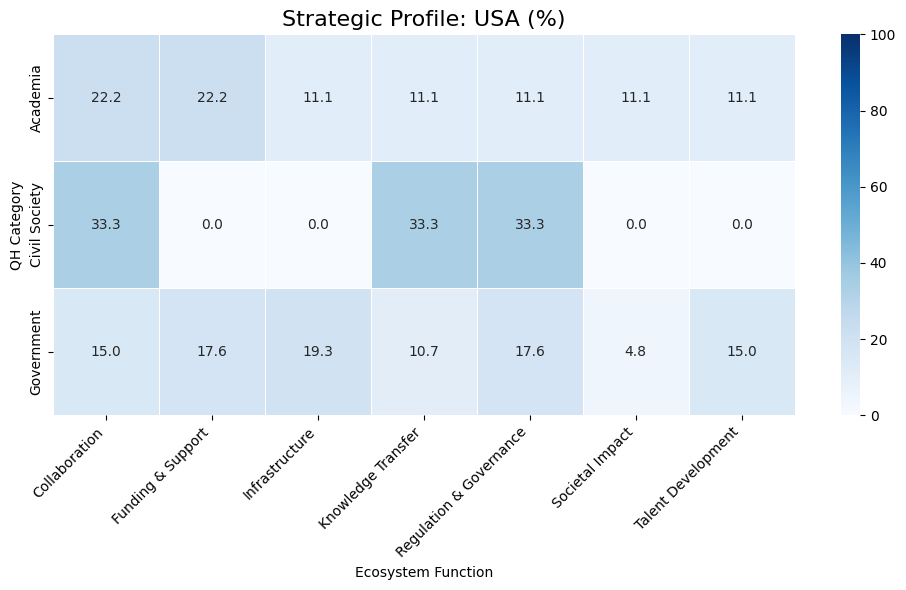

✅ Saved profile for USA.


In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. LOAD DATA
try:
    output_df = pd.read_csv("output.csv")
    entities_df = pd.read_csv("2entities_to_edit.csv")
    print("✅ Data loaded.")
except FileNotFoundError:
    print("❌ Error: Files missing.")

# 2. DEFINE THEMES (Keywords)
ecosystem_themes = {
    'Knowledge Transfer': r'spin-out|spin-off|commercializ|transfer|patent|licens|ipr|intellectual propert|startup',
    'Collaboration': r'collaborat|partner|consorti|joint|co-operat|cluster|hub|ecosystem|network',
    'Funding & Support': r'fund|grant|invest|subsidy|budget|procur|financ|support|capital',
    'Regulation & Governance': r'regulat|standard|govern|law|ethic|oversight|polic|framework|security',
    'Talent Development': r'educat|train|skill|workforce|talent|phd|student|curricul|graduat',
    'Societal Impact': r'societ|public|citizen|ethic|trust|responsibl|social|aware',
    'Infrastructure': r'infrastructur|testbed|facilit|lab|center|centre|fabricat'
}

# Ensure text is string
output_df['text'] = output_df['text'].fillna('').astype(str)

# 3. TEXT SCORING (Scan Paragraphs)
# We find which themes are present in which PARAGRAPH.
print("Scoring text for themes...")
for theme, pattern in ecosystem_themes.items():
    output_df[theme] = output_df['text'].str.contains(pattern, case=False, regex=True).astype(int)

# 4. PREPARE DATA (Strict Merge on IDs)
valid_qh = ['Academia', 'Government', 'Industry', 'Civil Society']

# Filter Entities
entities_df['qh_category'] = entities_df['qh_category'].astype(str).str.strip()
filtered_entities = entities_df[entities_df['qh_category'].isin(valid_qh)].copy()

# MERGE: This is the critical step. 
# We link an Actor to a Theme ONLY if they share the same Doc_ID and Paragraph_ID.
merged_df = pd.merge(
    filtered_entities,
    output_df[['Doc_ID', 'Paragraph_ID', 'Country'] + list(ecosystem_themes.keys())],
    on=['Doc_ID', 'Paragraph_ID', 'Country'],
    how='left'
)

# 5. NORMALIZATION PER COUNTRY
countries = merged_df['Country'].dropna().unique()

for country in countries:
    print(f"Processing {country}...")
    country_df = merged_df[merged_df['Country'] == country]
    
    if country_df.empty: continue
        
    # Melt to associate Categories with Themes
    melted = pd.melt(country_df, 
                     id_vars=['qh_category'], 
                     value_vars=list(ecosystem_themes.keys()), 
                     var_name='Ecosystem_Function', 
                     value_name='Present')
    
    # Filter for presence only
    melted = melted[melted['Present'] == 1]
    
    if melted.empty:
        print(f"  -> No themes found for {country}.")
        continue
        
    # Count Co-occurrences
    counts_matrix = melted.groupby(['qh_category', 'Ecosystem_Function']).size().unstack(fill_value=0)
    
    # --- NORMALIZATION (Row Percentages) ---
    # Calculates the share of each function for a specific actor type.
    row_sums = counts_matrix.sum(axis=1)
    normalized_matrix = counts_matrix.div(row_sums.replace(0, 1), axis=0) * 100
    
    # Save CSV
    normalized_matrix.round(2).to_csv(f"rq2_normalized_roles_{country}.csv")
    
    # Visualization
    plt.figure(figsize=(10, 6))
    sns.heatmap(normalized_matrix, annot=True, fmt='.1f', cmap='Blues', linewidths=.5, vmin=0, vmax=100)
    
    plt.title(f'Strategic Profile: {country} (%)', fontsize=16)
    plt.ylabel('QH Category')
    plt.xlabel('Ecosystem Function')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    
    plt.show()
    print(f"✅ Saved profile for {country}.")

Analysiere Netzwerk für: CAN...


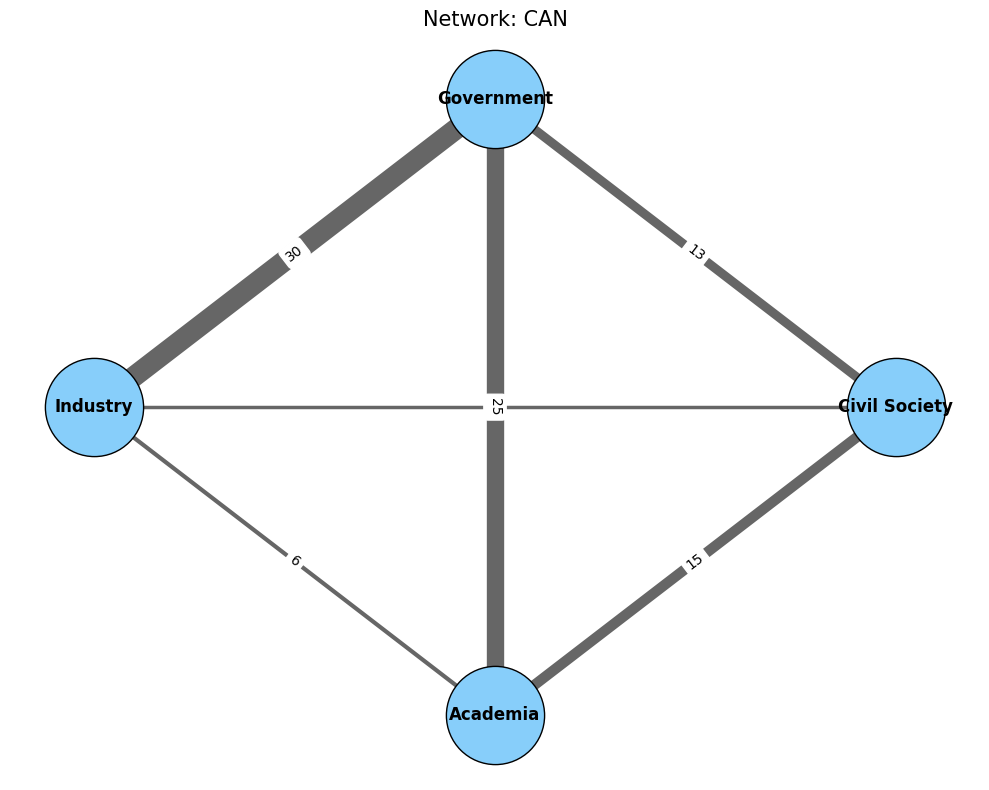

Analysiere Netzwerk für: GER...


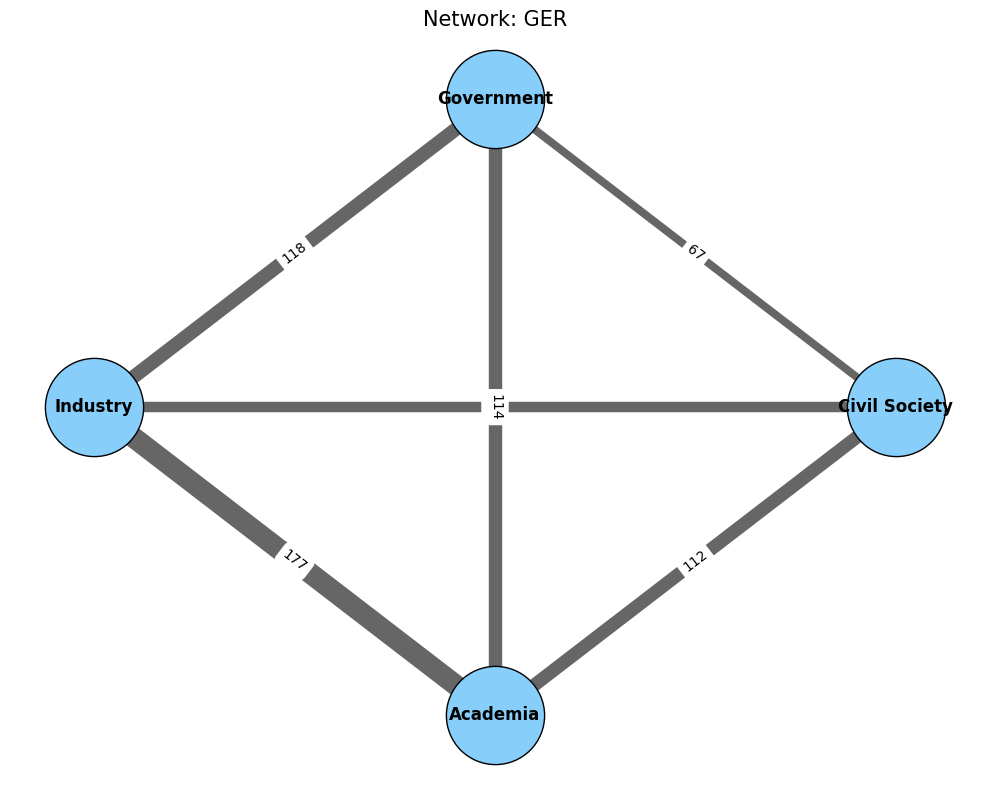

Analysiere Netzwerk für: UK...


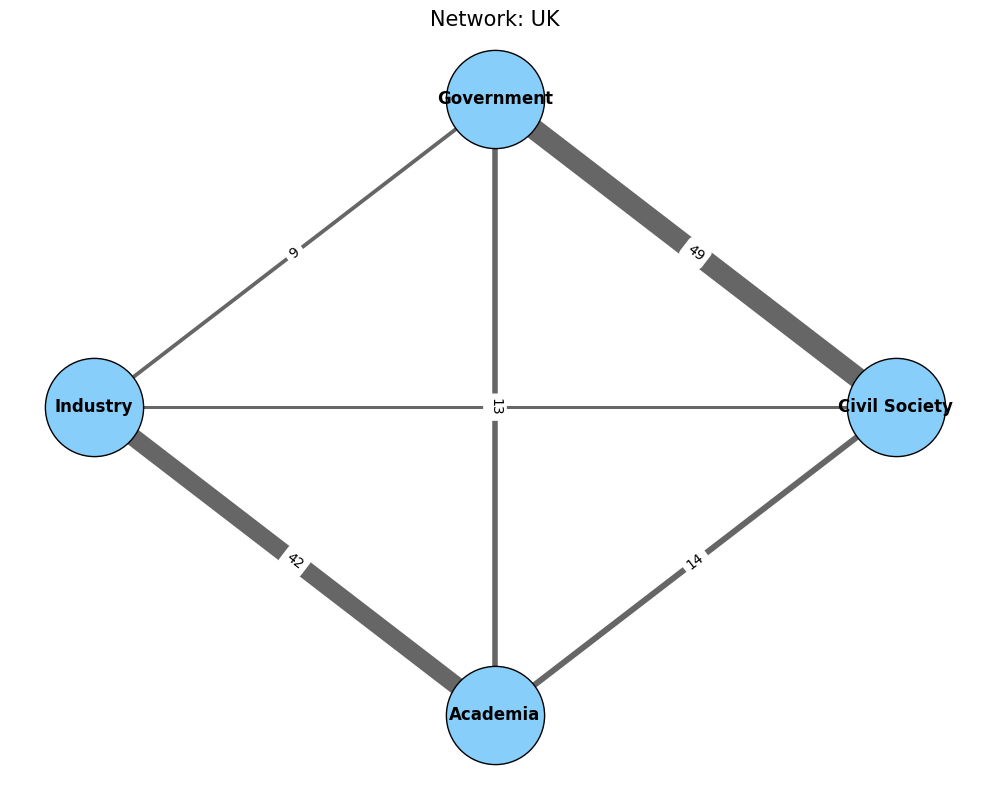

Analysiere Netzwerk für: USA...


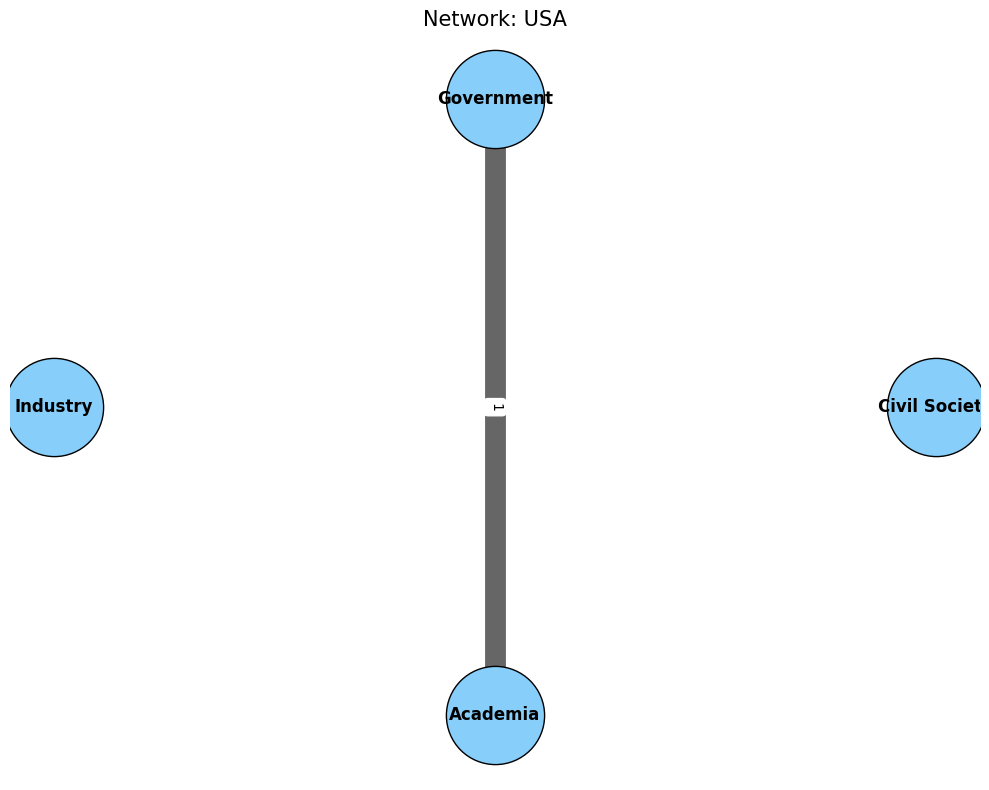

In [29]:
import pandas as pd
import itertools
import networkx as nx
import matplotlib.pyplot as plt

# 1. SETUP
TARGETS = ["Civil Society", "Government", "Industry", "Academia"]
df_ent_all = pd.read_csv("2entities_to_edit.csv").fillna("")

# Get Countries
if 'Country' in df_ent_all.columns:
    countries = df_ent_all['Country'].unique()
    countries = [c for c in countries if str(c).strip() != ""]
else:
    countries = []

# Filter for the targets we care about
df_ent_all['qh_category'] = df_ent_all['qh_category'].astype(str).str.strip()
df_ent_all = df_ent_all[df_ent_all['qh_category'].isin(TARGETS)]

# 2. LOOP OVER COUNTRIES
for country in countries:
    print(f"Analysiere Netzwerk für: {country}...")
    
    # Filter for specific country
    df_ent = df_ent_all[df_ent_all['Country'] == country]
    
    # Initialize Graph
    G = nx.Graph()
    G.add_nodes_from(TARGETS)
    
    # Group by (Doc_ID, Paragraph_ID) 
    # This replaces the text scanning logic entirely
    grouped = df_ent.groupby(['Doc_ID', 'Paragraph_ID'])
    
    for _, group in grouped:
        # Get list of categories in this paragraph
        found = group['qh_category'].tolist()
        
        # Need at least 2 entities to form a connection
        if len(found) >= 2:
            # Generate all pair combinations
            for c1, c2 in itertools.combinations(sorted(found), 2):
                if c1 != c2: # Exclude self-loops for the network graph
                    if G.has_edge(c1, c2):
                        G[c1][c2]['weight'] += 1
                    else:
                        G.add_edge(c1, c2, weight=1)

    # VISUALIZATION
    plt.figure(figsize=(10, 8))
    pos = nx.circular_layout(G)
    
    edges = G.edges(data=True)
    weights = [d['weight'] for u, v, d in edges]
    max_w = max(weights) if weights else 1
    
    # Draw Nodes & Edges
    nx.draw_networkx_nodes(G, pos, node_size=5000, node_color='#87CEFA', edgecolors='black')
    nx.draw_networkx_edges(G, pos, width=[(w/max_w)*15 for w in weights], alpha=0.6)
    nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold')
    nx.draw_networkx_edge_labels(G, pos, edge_labels={(u,v): d['weight'] for u,v,d in edges}, font_size=10)
    
    plt.title(f"Network: {country}", fontsize=15)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

Loading data...
Countries found: ['CAN' 'GER' 'UK' 'USA']
Generating Matrix for CAN...


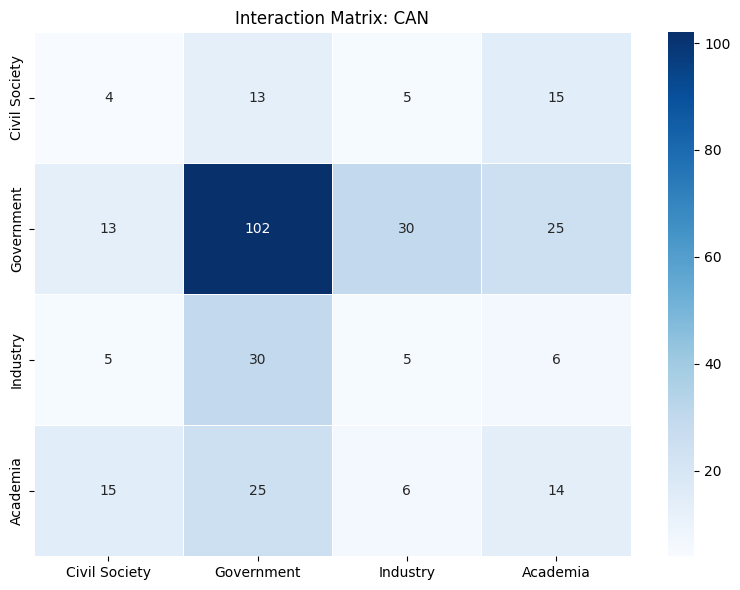

Generating Matrix for GER...


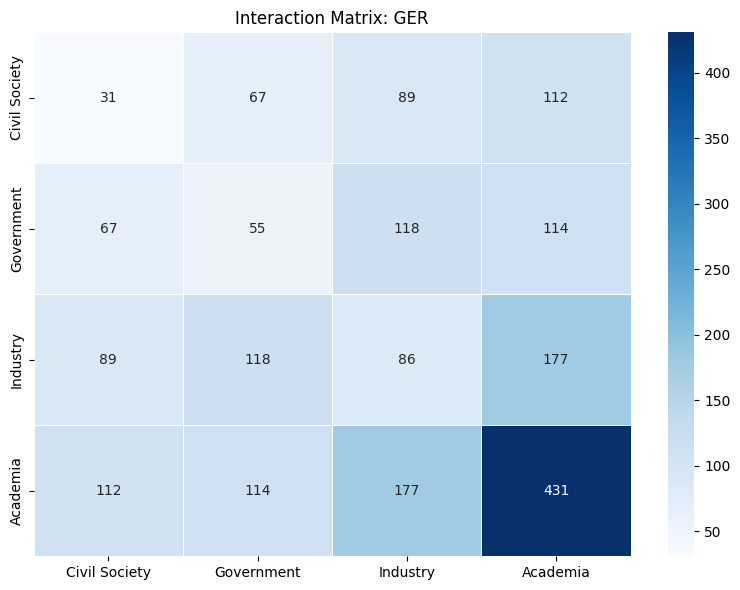

Generating Matrix for UK...


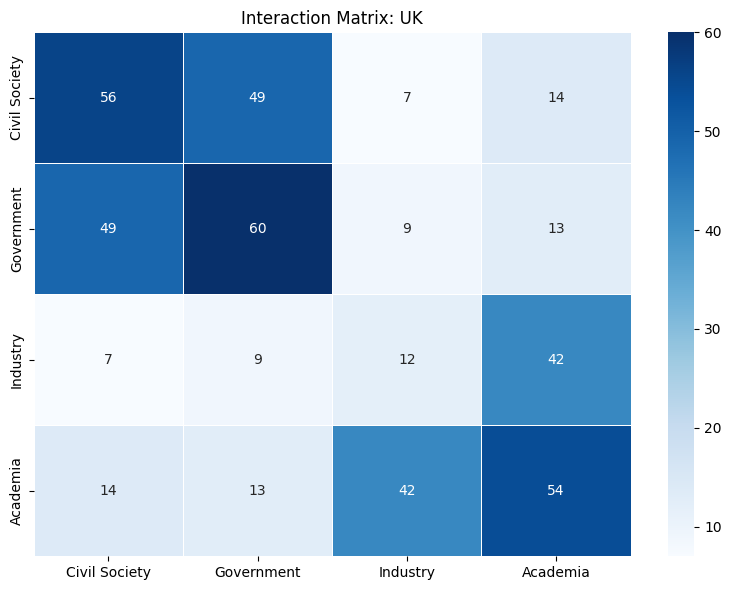

Generating Matrix for USA...


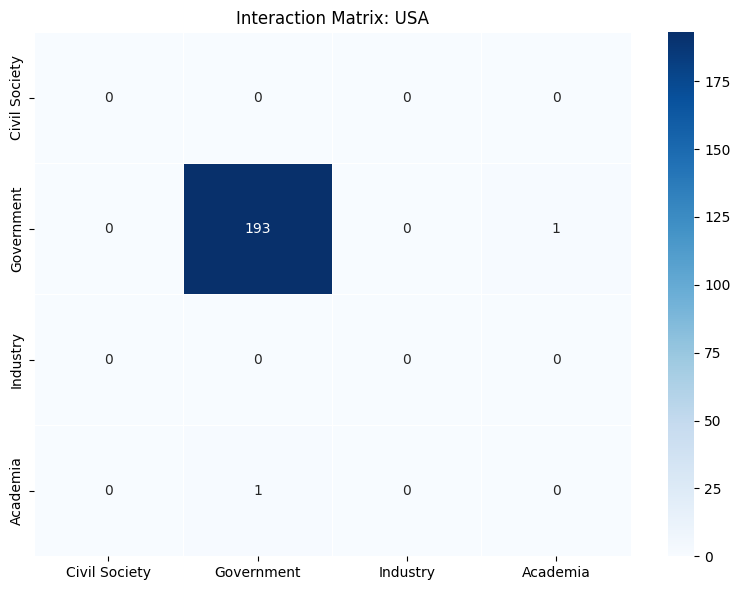

In [28]:
import pandas as pd
import itertools
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. CONFIGURATION ---
TARGETS = ["Civil Society", "Government", "Industry", "Academia"]
entities_csv = "2entities_to_edit.csv"

# --- 2. LOAD & PREPARE DATA ---
print("Loading data...")
df_ent = pd.read_csv(entities_csv)

# Filter for the 4 Helix Categories
df_ent['qh_category'] = df_ent['qh_category'].astype(str).str.strip()
df_ent = df_ent[df_ent['qh_category'].isin(TARGETS)]

# Get list of countries found in the data
countries = df_ent['Country'].dropna().unique()
print(f"Countries found: {countries}")

# --- 3. PROCESS EACH COUNTRY ---
for country in countries:
    print(f"Generating Matrix for {country}...")

    # Initialize 4x4 Zero Matrix
    matrix_df = pd.DataFrame(0, index=TARGETS, columns=TARGETS)

    # Filter data for this country
    df_subset = df_ent[df_ent['Country'] == country]

    # Group by Paragraph (Doc_ID + Paragraph_ID)
    # This identifies "actors that are together"
    grouped = df_subset.groupby(['Doc_ID', 'Paragraph_ID'])

    for _, group in grouped:
        # Get the list of categories in this paragraph
        categories = group['qh_category'].tolist()

        # Need at least 2 entities to form a connection
        if len(categories) < 2:
            continue

        # Create links for every pair found in the paragraph
        # sorted() ensures consistent order for processing
        for c1, c2 in itertools.combinations(sorted(categories), 2):
            matrix_df.loc[c1, c2] += 1
            if c1 != c2:
                matrix_df.loc[c2, c1] += 1  # Symmetry

    # --- 4. PLOT HEATMAP ---
    if matrix_df.sum().sum() > 0:
        plt.figure(figsize=(8, 6))
        sns.heatmap(matrix_df, annot=True, fmt='d', cmap="Blues", linewidths=.5)
        plt.title(f"Interaction Matrix: {country}")
        plt.tight_layout()
        # plt.savefig(f"{country}_heatmap.png") # Uncomment to save locally
        plt.show()
    else:
        print(f"No interactions found for {country}.")